<a href="https://colab.research.google.com/github/Gilnior/monografia/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
!rm sample_data/*
!curl -L -o sample_data/creditcardfraud.zip https://www.kaggle.com/api/v1/datasets/download/mlg-ulb/creditcardfraud
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud dataset usado
# https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023 outra opção

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 65.9M  100 65.9M    0     0  48.2M      0  0:00:01  0:00:01 --:--:--  116M


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#Read data and basic exploration

In [4]:
df = pd.read_csv('sample_data/creditcardfraud.zip', compression="zip")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print(df.Class.sum())
df.head()

492


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


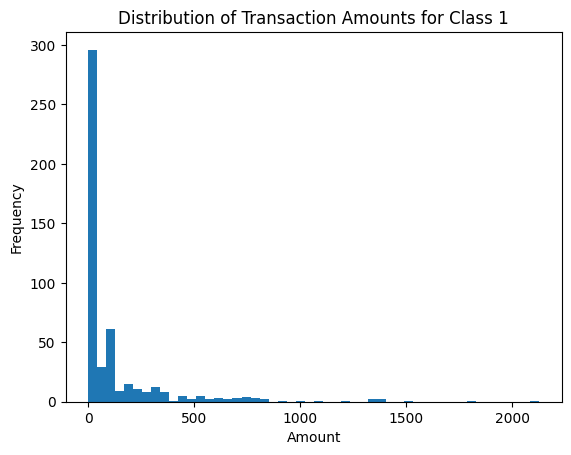

In [8]:
# prompt: Make a histogram with the column Amount of df filtered by Class==1

plt.hist(df[df['Class']==1]['Amount'], bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts for Class 1')
plt.show()

In [9]:
# prompt: Make a summary of the column Amount of df filtered by Class==1

df[df['Class'] == 1]['Amount'].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


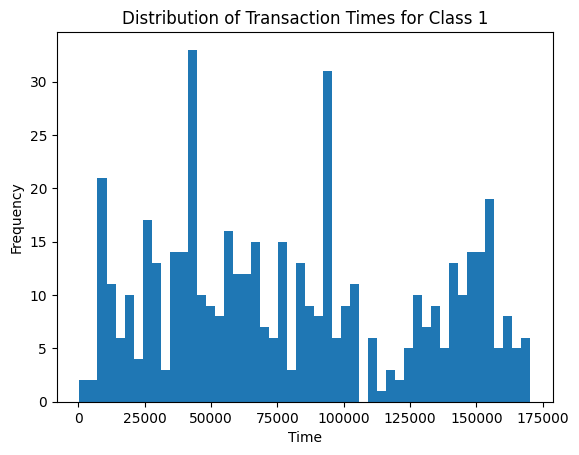

In [10]:
plt.hist(df[df['Class']==1]['Time'], bins=50)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Times for Class 1')
plt.show()

#Data Preparation

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import joblib

# Load your dataset
# df = pd.read_csv('your_data.csv')

# 1. Initial Data Splitting (Stratified)
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Feature Scaling
scaler = RobustScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

# 3. Create three under-sampling sets with different ratios
def create_under_samples(X, y, ratios):
    """
    Create under-sampled datasets with specified fraud:normal ratios
    ratios: list of tuples [(normal_ratio, fraud_ratio), ...]
    """
    results = {}
    fraud_idx = np.where(y == 1)[0]
    normal_idx = np.where(y == 0)[0]
    n_fraud = len(fraud_idx)

    for ratio_name, normal_ratio in ratios.items():
        # Calculate number of normal samples to keep
        n_normal = int(n_fraud * normal_ratio)

        # Randomly select normal samples
        np.random.seed(42)
        selected_normal = np.random.choice(normal_idx, size=n_normal, replace=False)

        # Combine with all fraud samples
        selected_idx = np.concatenate([selected_normal, fraud_idx])
        np.random.shuffle(selected_idx)

        # Create undersampled dataset
        X_under = X.iloc[selected_idx]
        y_under = y.iloc[selected_idx]

        results[ratio_name] = (X_under, y_under)

    return results

# Define our target ratios (fraud:normal)
ratios = {
    'under_1to1': 1,    # 1:1 ratio
    'under_1to4': 4,    # 1:4 ratio
    'under_1to9': 9     # 1:9 ratio
}

# Create undersampled datasets
under_samples = create_under_samples(X_train, y_train, ratios)

# 4. Create Dictionary of All Processed Datasets
processed_datasets = {
    'under_1to1': {
        'X_train': under_samples['under_1to1'][0],
        'y_train': under_samples['under_1to1'][1],
        'X_test': X_test,
        'y_test': y_test,
        'params': {'class_weight': None}
    },
    'under_1to4': {
        'X_train': under_samples['under_1to4'][0],
        'y_train': under_samples['under_1to4'][1],
        'X_test': X_test,
        'y_test': y_test,
        'params': {'class_weight': None}
    },
    'under_1to9': {
        'X_train': under_samples['under_1to9'][0],
        'y_train': under_samples['under_1to9'][1],
        'X_test': X_test,
        'y_test': y_test,
        'params': {'class_weight': None}
    }
}

# 5. Save Processed Data for Consistent Model Testing
joblib.dump(processed_datasets, 'undersampling_datasets.pkl')

# 6. Verification
print("\nClass Distribution Verification:")
print(f"Original train - Fraud: {sum(y_train==1)}, Normal: {sum(y_train==0)}")
for name, (X_under, y_under) in under_samples.items():
    ratio = ratios[name]
    print(f"{name} - Fraud: {sum(y_under==1)}, Normal: {sum(y_under==0)} (Target ratio 1:{ratio})")
print(f"Test set - Fraud: {sum(y_test==1)}, Normal: {sum(y_test==0)}")

print("\nSample Sizes:")
for name in processed_datasets:
    print(f"{name}: {len(processed_datasets[name]['y_train'])} samples")


Class Distribution Verification:
Original train - Fraud: 394, Normal: 227451
under_1to1 - Fraud: 394, Normal: 394 (Target ratio 1:1)
under_1to4 - Fraud: 394, Normal: 1576 (Target ratio 1:4)
under_1to9 - Fraud: 394, Normal: 3546 (Target ratio 1:9)
Test set - Fraud: 98, Normal: 56864

Sample Sizes:
under_1to1: 788 samples
under_1to4: 1970 samples
under_1to9: 3940 samples


#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd

def evaluate_svm(datasets):
    """
    Tests SVM with RBF kernel on all dataset variants
    Returns DataFrame with metrics and best parameters
    """
    results = []

    # RBF kernel parameter grid (aligned with HSVM paper's μ and F)
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.1, 1],
        'kernel': ['rbf'],

        # 'C': [0.1, 1, 10, 100],
        # 'gamma': ['scale', 0.1, 0.01, 1],
        # 'kernel': ['rbf']
    }

    for method, data in datasets.items():
        print(f"\nTraining SVM with {method}...")

        # Initialize and tune SVM
        svm = GridSearchCV(
            SVC(probability=True, random_state=42, **data['params']),
            param_grid,
            cv=5,
            scoring='recall',
            n_jobs=-1,
            verbose=1,
        )

        # Fit with appropriate parameters
        svm.fit(data['X_train'], data['y_train'])

        # Predictions
        y_pred = svm.predict(data['X_test'])
        y_proba = svm.predict_proba(data['X_test'])[:, 1]

        # Store results
        results.append({
            'Method': method,
            'Best Params': svm.best_params_,
            'Recall': recall_score(data['y_test'], y_pred),
            'Precision': precision_score(data['y_test'], y_pred),
            'F1-Score': f1_score(data['y_test'], y_pred),
            'ROC-AUC': roc_auc_score(data['y_test'], y_proba),
            'Support Vectors': svm.best_estimator_.support_vectors_.shape[0],
            'Train Samples': len(data['X_train'])
        })

    return pd.DataFrame(results)

# Run evaluation
svm_results = evaluate_svm(processed_datasets)

# Display formatted results
print("\n=== SVM Performance Comparison ===")
print(svm_results[['Method', 'Recall', 'Precision', 'F1-Score', 'ROC-AUC']])

# Generate visual comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
svm_results.set_index('Method')[['Recall', 'Precision', 'F1-Score']].plot(kind='bar')
plt.title("SVM Performance by Imbalance Handling Method")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


Training SVM with under_1to1...
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Training SVM with under_1to4...
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Training SVM with under_1to9...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


#ANN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.cluster import KMeans

class RBFTensorFlow(keras.layers.Layer):
    """RBF Layer implementation matching Clementine's approach"""
    def __init__(self, n_centers=20, **kwargs):
        super(RBFTensorFlow, self).__init__(**kwargs)
        self.n_centers = n_centers

    def build(self, input_shape):
        self.centers = self.add_weight(
            name='centers',
            shape=(self.n_centers, input_shape[-1]),
            initializer='glorot_uniform',
            trainable=True
        )
        self.sigmas = self.add_weight(
            name='sigmas',
            shape=(self.n_centers,),
            initializer='ones',
            trainable=True
        )
        super(RBFTensorFlow, self).build(input_shape)

    def call(self, inputs):
        diff = tf.expand_dims(inputs, 1) - tf.expand_dims(self.centers, 0)
        distances = tf.reduce_sum(tf.square(diff), axis=2)
        return tf.exp(-distances / (2 * tf.square(self.sigmas)))

def build_rbfn_model(input_shape, n_centers=20):
    model = keras.Sequential([
        keras.layers.Input(shape=(input_shape,)),
        RBFTensorFlow(n_centers=n_centers),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.3, momentum=0.9),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

class DynamicTopologyModel:
    def __init__(self, max_neurons=50, min_delta=0.001):
        self.max_neurons = max_neurons
        self.min_delta = min_delta
        self.model = None

    def build_model(self, input_shape, n_neurons):
        model = keras.Sequential([
            keras.layers.Dense(n_neurons, activation='sigmoid', input_shape=(input_shape,)),
            keras.layers.Dense(1, activation='sigmoid')
        ])
        model.compile(
            optimizer=keras.optimizers.SGD(learning_rate=0.3, momentum=0.9),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model

    def fit(self, X, y, validation_data=None, epochs=100, batch_size=256):
        input_shape = X.shape[1]
        best_accuracy = 0
        best_model = None
        n_neurons = 3

        while n_neurons <= self.max_neurons:
            model = self.build_model(input_shape, n_neurons)
            history = model.fit(
                X, y,
                validation_data=validation_data,
                epochs=epochs,
                batch_size=batch_size,
                verbose=0
            )
            val_acc = max(history.history['val_accuracy'])
            if val_acc - best_accuracy > self.min_delta:
                best_accuracy = val_acc
                best_model = model
                n_neurons += 5
            else:
                break

        self.model = best_model
        return self

def safe_evaluate(model, X_test, y_test):
    """Robust evaluation handling different model types and outputs"""
    y_pred_proba = model.predict(X_test)

    # Handle different output shapes
    if y_pred_proba.ndim > 1:
        y_pred_proba = y_pred_proba.flatten() if y_pred_proba.shape[1] == 1 else y_pred_proba[:, 1]

    y_pred = (y_pred_proba > 0.5).astype(int)
    y_test = np.array(y_test).flatten()

    return {
        'accuracy': np.mean(y_pred == y_test),
        'tpr': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'report': classification_report(y_test, y_pred, digits=4)
    }

def evaluate_all_methods(processed_datasets):
    """Evaluate all six ANN methods across all dataset versions"""
    methods = ['rbfn', 'quick', 'dynamic']
    results = {}

    for method in methods:
        method_results = {}
        print(f"\nEvaluating {method} method...")

        for ds_name, data in processed_datasets.items():
            print(f"  Dataset: {ds_name}")
            X_train, y_train = data['X_train'], data['y_train']
            X_val, X_tr = X_train[:len(X_train)//5], X_train[len(X_train)//5:]
            y_val, y_tr = y_train[:len(y_train)//5], y_train[len(y_train)//5:]

            # Build and train model
            if method == 'rbfn':
                model = build_rbfn_model(X_tr.shape[1])
                model.fit(X_tr, y_tr, epochs=100, verbose=0)
            elif method == 'quick':
                ni_plus_no = X_tr.shape[1] + 1
                hidden_units = max(3 * (ni_plus_no) // 20, 3)
                model = keras.Sequential([
                    keras.layers.Dense(hidden_units, activation='sigmoid', input_shape=(X_tr.shape[1],)),
                    keras.layers.Dense(1, activation='sigmoid')
                ])
                model.compile(optimizer=keras.optimizers.SGD(0.3, momentum=0.9),
                            loss='binary_crossentropy', metrics=['accuracy'])
                model.fit(X_tr, y_tr, epochs=100, verbose=0)
            elif method == 'dynamic':
                model = DynamicTopologyModel()
                model.fit(X_tr, y_tr, validation_data=(X_val, y_val))
                model = model.model

            # Evaluate
            metrics = safe_evaluate(model, data['X_test'], data['y_test'])
            method_results[ds_name] = metrics

            print(f"Accuracy: {metrics['accuracy']:.4f}  TPR: {metrics['tpr']:.4f} Precision: {metrics['precision']:.4f}  f1: {metrics['f1']:.4f}  AUC: {metrics['roc_auc']:.4f}")

        results[method] = method_results

    return results

# Execute evaluation
final_results = evaluate_all_methods(processed_datasets)

#Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                           roc_auc_score, confusion_matrix, classification_report,
                           make_scorer)
from sklearn.preprocessing import StandardScaler
from joblib import parallel_backend

def tune_and_evaluate_logistic_regression(processed_datasets):
    """
    Perform hyperparameter tuning and evaluation for logistic regression
    across all dataset versions with parallel processing support.
    """
    results = {}

    # Define hyperparameter grid
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'penalty': ['l1', 'l2'],               # Regularization type
        'solver': ['saga'],                    # Solver that handles both L1/L2
        'class_weight': [None, 'balanced']     # Handling class imbalance
    }

    # Custom scoring metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score),
        'roc_auc': make_scorer(roc_auc_score),
        'f1': make_scorer(f1_score)
    }

    for ds_name, data in processed_datasets.items():
        print(f"\n=== Processing {ds_name} dataset ===")

        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(data['X_train'])
        X_test_scaled = scaler.transform(data['X_test'])

        # Initialize logistic regression
        lr = LogisticRegression(max_iter=1000, random_state=42)

        # Setup stratified cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # Perform grid search with parallel processing
        with parallel_backend('threading', n_jobs=-1):
            grid_search = GridSearchCV(
                estimator=lr,
                param_grid=param_grid,
                scoring=scoring,
                refit='roc_auc',  # Optimize for AUC
                cv=cv,
                verbose=1,
                n_jobs=-1
            )
            grid_search.fit(X_train_scaled, data['y_train'])

        # Get best model
        best_model = grid_search.best_estimator_

        # Predictions
        y_pred = best_model.predict(X_test_scaled)
        y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

        # Store results
        results[ds_name] = {
            'best_params': grid_search.best_params_,
            'accuracy': accuracy_score(data['y_test'], y_pred),
            'recall': recall_score(data['y_test'], y_pred),
            'precision': precision_score(data['y_test'], y_pred),
            'f1': f1_score(data['y_test'], y_pred),
            'roc_auc': roc_auc_score(data['y_test'], y_proba),
            'confusion_matrix': confusion_matrix(data['y_test'], y_pred),
            'classification_report': classification_report(data['y_test'], y_pred, digits=4),
            'cv_results': pd.DataFrame(grid_search.cv_results_),
            'feature_importance': best_model.coef_[0] if hasattr(best_model, 'coef_') else None
        }

        # Print summary
        print(f"\nBest parameters: {grid_search.best_params_}")
        print(f"Test ROC AUC: {results[ds_name]['roc_auc']:.4f}")
        print(f"Recall (TPR): {results[ds_name]['recall']:.4f}")
        print(f"Precision: {results[ds_name]['precision']:.4f}")
        print("Confusion Matrix:")
        print(results[ds_name]['confusion_matrix'])

    return results

# Execute the tuning and evaluation
lr_results = tune_and_evaluate_logistic_regression(processed_datasets)

# Example of accessing results:
# print(lr_results['under_1to1']['best_params'])  # Best params for 1:1 ratio
# print(lr_results['under_1to4']['cv_results'])   # Full CV results for 1:4

# Comparação entre os modelos

In [ ]:
print(final_results.keys())
print(final_results["rbfn"].keys())
print(final_results["rbfn"]["under_1to1"].keys())

print(svm_results.keys())
print(svm_results["Method"])

print(lr_results.keys())
print(lr_results["under_1to1"].keys())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data structure
ratios = ['1:1', '1:4', '1:9']
models = {
    'SVM': svm_results,
    'Logistic Regression': lr_results,
    'RBFN ANN': final_results['rbfn'],
    'Quick ANN': final_results['quick'],
    'Dynamic ANN': final_results['dynamic']
}

# Create plot
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

for i, (model_name, model_data) in enumerate(models.items()):
    recalls = []
    for ratio in ['under_1to1', 'under_1to4', 'under_1to9']:
        if model_name == 'SVM':
            svm_ratio_index = model_data["Method"].loc[model_data["Method"] == ratio].index[0]
            # print(svm_ratio_index)
            recalls.append(model_data['Recall'].iloc[svm_ratio_index])
        elif model_name == 'Logistic Regression':
            recalls.append(model_data[ratio]['recall'])
        else:  # ANN models
            recalls.append(model_data[ratio]['tpr'])

    plt.plot(ratios, recalls, 'o-', color=colors[i], label=model_name, linewidth=2.5, markersize=10)

# Formatting
plt.title('Recall Comparison Across Models and Class Ratios', pad=20, fontsize=14)
plt.xlabel('Class Ratio (Fraud:Normal)', labelpad=10, fontsize=12)
plt.ylabel('Recall (TPR)', labelpad=10, fontsize=12)
plt.ylim(0.8, 1.0)  # Focus on relevant range
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate values
for model_name, model_data in models.items():
    for j, ratio in enumerate(['under_1to1', 'under_1to4', 'under_1to9']):
        if model_name == 'SVM':
            svm_ratio_index = model_data["Method"].loc[model_data["Method"] == ratio].index[0]
            val = model_data['Recall'].iloc[svm_ratio_index]
        elif model_name == 'Logistic Regression':
            val = model_data[ratio]['recall']
        else:
            val = model_data[ratio]['tpr']
        plt.text(j, val+0.01, f'{val:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data structure
ratios = ['1:1', '1:4', '1:9']
models = {
    'SVM': svm_results,
    'Logistic Regression': lr_results,
    'RBFN ANN': final_results['rbfn'],
    'Quick ANN': final_results['quick'],
    'Dynamic ANN': final_results['dynamic']
}

# Create plot
plt.figure(figsize=(12, 6))
colors = plt.cm.plasma(np.linspace(0, 1, len(models)))  # Changed colormap for distinction

for i, (model_name, model_data) in enumerate(models.items()):
    precisions = []
    for ratio in ['under_1to1', 'under_1to4', 'under_1to9']:
        if model_name == 'SVM':
            svm_ratio_index = model_data["Method"].loc[model_data["Method"] == ratio].index[0]
            precisions.append(model_data['Precision'].iloc[svm_ratio_index])
        elif model_name == 'Logistic Regression':
            precisions.append(model_data[ratio]['precision'])
        else:  # ANN models
            precisions.append(model_data[ratio]['precision'])

    plt.plot(ratios, precisions, 's-', color=colors[i], label=model_name,
             linewidth=2.5, markersize=10, markeredgecolor='w', markeredgewidth=1)

# Formatting
plt.title('Precision Comparison Across Models and Class Ratios', pad=20, fontsize=14)
plt.xlabel('Class Ratio (Fraud:Normal)', labelpad=10, fontsize=12)
plt.ylabel('Precision', labelpad=10, fontsize=12)
plt.ylim(0, 0.5)  # Adjusted range for precision values
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate values
for model_name, model_data in models.items():
    for j, ratio in enumerate(['under_1to1', 'under_1to4', 'under_1to9']):
        if model_name == 'SVM':
            svm_ratio_index = model_data["Method"].loc[model_data["Method"] == ratio].index[0]
            val = model_data['Precision'].iloc[svm_ratio_index]
        elif model_name == 'Logistic Regression':
            val = model_data[ratio]['precision']
        else:
            val = model_data[ratio]['precision']
        plt.text(j, val+0.01, f'{val:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

Recall is the proportion of correctly identified positives (TP) out of all actual positives (TP + FN).

Precision is the proportion of correctly predicted positives (TP) out of all predicted positives (TP + FP).